In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
# Import data
full_df = pd.read_csv('../data/ohe_data.csv')

full_df.drop(columns=['Start_Time', 'Start_Lat', 'Start_Lng'], inplace=True)

# drop "Unnamed: 0" column if exists
if "Unnamed: 0" in full_df.columns: full_df.drop(columns=['Unnamed: 0'], inplace=True)

# correct sunrise/sunset column to be numerical if not, 0=Day, 1=Night
full_df = full_df.replace({'Day': 0, 'Night': 1})

# make any true/false values into 1/0
full_df = full_df.replace({True: 1, False: 0})

In [134]:
model_df = full_df
model_df.shape, model_df['Severity'].value_counts(normalize=True)

((2731050, 130),
 0    0.900065
 1    0.099935
 Name: Severity, dtype: float64)

In [135]:
# create X and y
X = model_df.drop('Severity', axis=1)
y = model_df['Severity']

# resample to even out categories via undersampling majority class
rus = RandomUnderSampler(random_state=1)
X_rs, y_rs = rus.fit_resample(X, y)
print(X_rs.shape, y_rs.shape)
print(y_rs.value_counts(normalize=True))

# scale X data
mms = MinMaxScaler()
X_mms = mms.fit_transform(X_rs)

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X_mms, y_rs,
                                                    stratify=y_rs,
                                                    random_state=1)

(545856, 129) (545856,)
0    0.5
1    0.5
Name: Severity, dtype: float64


In [136]:
nn = Sequential()
#nn.add(Input(shape=X_train.shape[1]))
nn.add(Dense(32, 'relu'))
nn.add(Dense(1, 'sigmoid'))

In [137]:
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

In [139]:
%%time

nnh = nn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
3199/3199 [==============================] - 6s 2ms/step - loss: 0.3499 - accuracy: 0.8529 - precision: 0.8415 - recall: 0.8698 - val_loss: 0.3562 - val_accuracy: 0.8510 - val_precision: 0.8375 - val_recall: 0.8710
Epoch 2/20
3199/3199 [==============================] - 6s 2ms/step - loss: 0.3497 - accuracy: 0.8534 - precision: 0.8418 - recall: 0.8703 - val_loss: 0.3561 - val_accuracy: 0.8508 - val_precision: 0.8399 - val_recall: 0.8668
Epoch 3/20
3199/3199 [==============================] - 6s 2ms/step - loss: 0.3493 - accuracy: 0.8533 - precision: 0.8416 - recall: 0.8705 - val_loss: 0.3565 - val_accuracy: 0.8511 - val_precision: 0.8365 - val_recall: 0.8729
Epoch 4/20
3199/3199 [==============================] - 6s 2ms/step - loss: 0.3490 - accuracy: 0.8536 - precision: 0.8420 - recall: 0.8705 - val_loss: 0.3559 - val_accuracy: 0.8513 - val_precision: 0.8359 - val_recall: 0.8743
Epoch 5/20
3199/3199 [==============================] - 6s 2ms/step - loss: 0.3486 - accuracy: 0

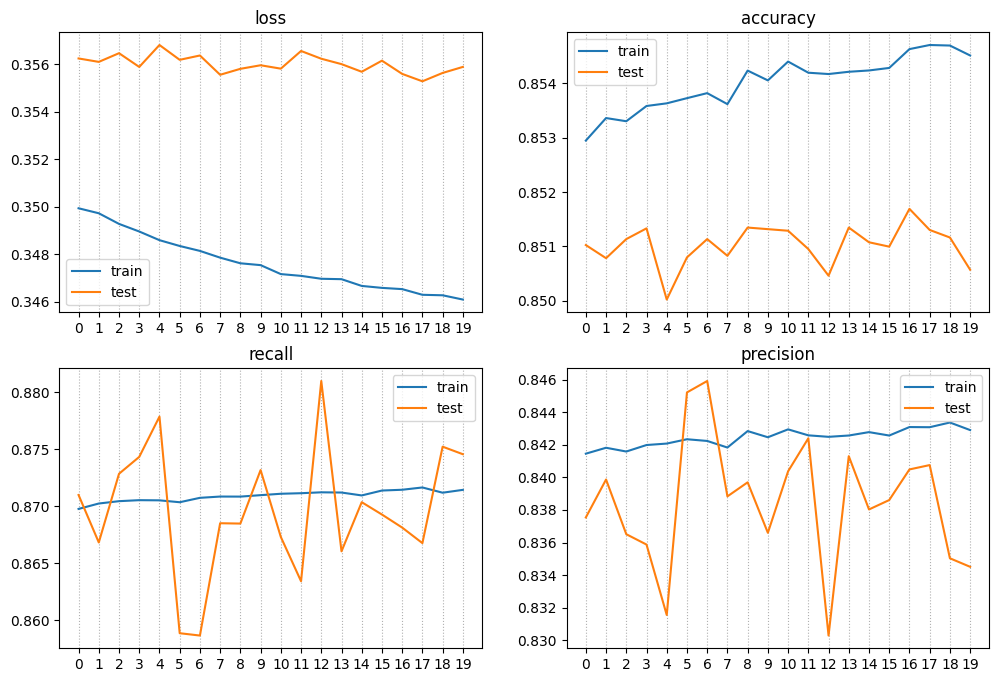

In [141]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

metrics = ['loss', 'accuracy', 'recall', 'precision']
ix = 0

for i in (0,1):
    for j in (0,1):
        m = metrics[ix]
        ax[i][j].plot(nnh.history[m], label='train')
        ax[i][j].plot(nnh.history['val_' + m], label='test')
        #ax.set_ylim(0.2, 0.3)
        ax[i][j].set_xticks(list(range(0,20)))
        ax[i][j].grid(True, axis='x', ls=':')
        ax[i][j].set_title(m)
        ax[i][j].legend()
        ix += 1

In [142]:
# If we are aiming for best recall, then 12 epochs is best on this run

nn2 = Sequential()
#nn.add(Input(shape=X_train.shape[1]))
nn2.add(Dense(32, 'relu'))
nn2.add(Dense(1, 'sigmoid'))

nn2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

nnh2 = nn2.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=12,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/12
3199/3199 [==============================] - 5s 1ms/step - loss: 0.3992 - accuracy: 0.8308 - precision: 0.8209 - recall: 0.8463 - val_loss: 0.3729 - val_accuracy: 0.8429 - val_precision: 0.8267 - val_recall: 0.8677
Epoch 2/12
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3651 - accuracy: 0.8466 - precision: 0.8327 - recall: 0.8674 - val_loss: 0.3645 - val_accuracy: 0.8470 - val_precision: 0.8308 - val_recall: 0.8714
Epoch 3/12
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3596 - accuracy: 0.8490 - precision: 0.8364 - recall: 0.8677 - val_loss: 0.3615 - val_accuracy: 0.8481 - val_precision: 0.8364 - val_recall: 0.8656
Epoch 4/12
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3569 - accuracy: 0.8499 - precision: 0.8376 - recall: 0.8683 - val_loss: 0.3612 - val_accuracy: 0.8487 - val_precision: 0.8296 - val_recall: 0.8777
Epoch 5/12
3199/3199 [==============================] - 4s 1ms/step - loss: 0.3554 - accuracy: 0

In [147]:
test_preds = nn2.predict(X_test)

4265/4265 [==============================] - 3s 605us/step


In [157]:
cm = confusion_matrix(y_test, (test_preds >= 0.5).astype(int), normalize='true')
cm

array([[0.84327002, 0.15672998],
       [0.14172236, 0.85827764]])

In [159]:
tn, fp, fn, tp = cm.flatten()
tn, fp, fn, tp

(0.8432700199319967,
 0.1567299800680033,
 0.14172235901043498,
 0.858277640989565)

In [160]:
recall = tp / (tp + fn)
recall

0.858277640989565

In [ ]:
# try model on a few random samples
n_tries = 5
for i in range(n_tries):
    p